<a href="https://colab.research.google.com/github/Mr-big-cake/Fundamental_AI/blob/main/Lab_4/AI_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №4  
1) Взять тестовую функцию и с помощью Optuna найти для нее оптимум  
2*) Взять готовые датасеты из sclearn, которые не рассмотрены на сайте optuna и взять готовую любую модель из раздела классификация в sclearn, посмотреть какие параметры принимает данная модель и попровобвать хотя бы 1 параметр этой модели подобрать с поомщью  Optuna

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 4.2 MB/s 
     |████████████████████████████████| 209 kB 44.9 MB/s 
     |████████████████████████████████| 81 kB 2.6 MB/s 
     |████████████████████████████████| 78 kB 2.1 MB/s 
     |████████████████████████████████| 147 kB 11.7 MB/s 
     |████████████████████████████████| 112 kB 5.5 MB/s 
     |████████████████████████████████| 50 kB 1.8 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=ed08bcadac9e5d34cf3eaa53ba0225af3e821e4820c30923e276397c1f9a66b7
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import math
import optuna
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rc
from matplotlib import colors as cm
from enum import Enum

In [ ]:
from enum import Enum
class Function(Enum):
  Izoma = 1
  CrossInTtray = 2

class Visualization():
  @staticmethod
  def plot(f : Function, point:list = []):
    if(f == Function.Izoma):
      Visualization.plot_Izoma(point)
    if(f == Function.CrossInTtray):
      Visualization.plot_CrossInTtray(point)

  @staticmethod
  def plot_Izoma(point:list = []):
    x = np.linspace(-5, 5, 150)
    y = np.linspace(-5, 5, 150)
    X, Y = np.meshgrid(x, y) 
    Z = Visualization.Izoma(X, Y)
    fig = plt.figure(figsize=(20,15))
    ax = fig.gca(projection='3d')
    if(len(point) != 3):
      ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='seismic', linewidth=1, antialiased=False)
    ax.plot_wireframe(X, Y, Z, color ='red',  rstride=2, cstride=2, alpha = 0.2) 
    ax.view_init(30, 45)
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.set_zlabel('z', fontsize=10)
    ax.set_title('Функция Изома', fontsize=15)
    if(len(point) == 3):
      ax.scatter(point[0], point[1], point[2], linewidths  = 8 ,
               color='black', alpha = 1, label = 'Оптимум')
      ax.legend(fontsize=15, loc='lower left' )
    plt.show()
  
  @staticmethod
  def plot_CrossInTtray(point:list = []):
    x = np.linspace(-5, 5, 350)
    y = np.linspace(-5, 5, 350)
    X, Y = np.meshgrid(x, y) 
    Z = Visualization.CrossInTtray(X, Y)
    fig = plt.figure(figsize=(20,15))
    ax = fig.gca(projection='3d')
    if(len(point) != 3):
      ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='seismic', linewidth=1, antialiased=False)
    ax.plot_wireframe(X, Y, Z, color ='red',  rstride=2, cstride=2, alpha = 0.2) 
    ax.view_init(70, 45)
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.set_zlabel('z', fontsize=10)
    ax.set_title('Функция крест на подносе', fontsize=15)
    if(len(point) == 3):
      ax.scatter(point[0], point[1], point[2], linewidths  = 8 ,
               color='black', alpha = 1, label = 'Оптимум')
      ax.legend(fontsize=15, loc='lower left' )
    plt.show()

  @staticmethod
  def Izoma (x: np.ndarray, y:np.ndarray) -> np.float128 :
    return (-1)*np.cos(x)*np.cos(y)*np.exp((-1)*((x-np.pi)**2 + (y-np.pi)**2))
  
  @staticmethod
  def CrossInTtray(x: np.ndarray, y:np.ndarray) -> np.float128 :
    return -0.0001*(1 + np.abs(np.sin(x)*np.sin(y)*np.exp(np.abs(100 - (np.sqrt(x*x + y*y))/(np.pi)))) )**0.1


class OptunaObjective:
  def __init__(self, f:Function = Function.CrossInTtray):
    if (f == Function.CrossInTtray):
      self.f = Visualization.CrossInTtray
    elif (f == Function.Izoma):
      self.f = Visualization.Izoma
    else:
      self.f = Visualization.CrossInTtray

  def objective(self, trial):
    x = trial.suggest_float("x", -10, 10)
    y = trial.suggest_float("y", -10, 10)
    return self.f(x, y)
  
  def Study(self, _n_trials = 1000):
    study = optuna.create_study()
    study.optimize(self.objective, n_trials = _n_trials)
    best_params = study.best_params
    found_x = best_params["x"]
    found_y = best_params["y"]
    return found_x, found_y

#Поиск оптимума функций Изома и "Крест на подносе"

In [ ]:
cross_optuna = OptunaObjective(Function.CrossInTtray)
found_x, found_y = cross_optuna.Study()

Искомая точка: 
	x = +-1.34941 
	y = +-1.349241 
	F(x, y) = - 2.06261
Answer: 
	~x = -1.3244433042758428 
	~y = -1.3980634215743937 
	F(~x, ~y) = -2.062243145364164


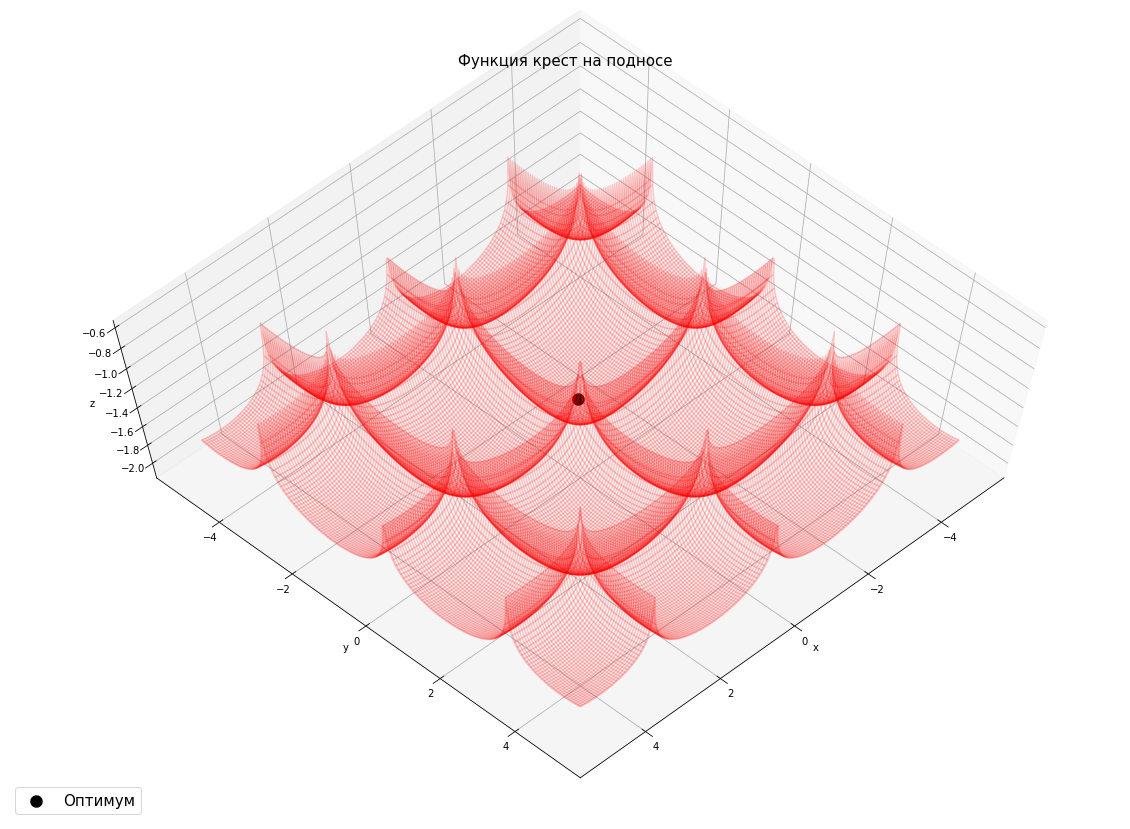

In [ ]:
print("Искомая точка: \n\tx = +-1.34941 \n\ty = +-1.349241 \n\tF(x, y) = - 2.06261")
print("Answer: \n\t~x =",  found_x, "\n\t~y =", found_y, "\n\tF(~x, ~y) =", Visualization.CrossInTtray(found_x, found_y))
Visualization.plot(f=Function.CrossInTtray, point = [found_x, found_y, Visualization.CrossInTtray(found_x, found_y)])

#Пункт 2

In [ ]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import logging
import sys

In [ ]:
dataset, target = load_digits(return_X_y=True)
t_x, v_x, t_y, v_y = train_test_split(dataset, target)

def optuna_opt(trial):
  arg_C = trial.suggest_float("C", 1, 10, log=True)
  tol = trial.suggest_float("tol", 1e-2, 1e-1, log=True)

  clf = PassiveAggressiveClassifier(C=arg_C, tol=tol)
  for step in range(100):
    clf.fit(t_x, t_y)
    intermediate_value = clf.score(v_x, v_y)
    trial.report(intermediate_value, step=step)
    if trial.should_prune():
      raise optuna.TrialPruned()
    return clf.score(v_x, v_y)

optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=20))
study.optimize(optuna_opt, n_trials=20)

[I 2022-11-05 11:07:27,322] A new study created in memory with name: no-name-2c720a57-7cbd-4db7-8742-14254f714c9f


A new study created in memory with name: no-name-2c720a57-7cbd-4db7-8742-14254f714c9f
A new study created in memory with name: no-name-2c720a57-7cbd-4db7-8742-14254f714c9f
A new study created in memory with name: no-name-2c720a57-7cbd-4db7-8742-14254f714c9f


[I 2022-11-05 11:07:27,375] Trial 0 finished with value: 0.9555555555555556 and parameters: {'C': 1.463757051668152, 'tol': 0.03639143830523719}. Best is trial 0 with value: 0.9555555555555556.


Trial 0 finished with value: 0.9555555555555556 and parameters: {'C': 1.463757051668152, 'tol': 0.03639143830523719}. Best is trial 0 with value: 0.9555555555555556.
Trial 0 finished with value: 0.9555555555555556 and parameters: {'C': 1.463757051668152, 'tol': 0.03639143830523719}. Best is trial 0 with value: 0.9555555555555556.
Trial 0 finished with value: 0.9555555555555556 and parameters: {'C': 1.463757051668152, 'tol': 0.03639143830523719}. Best is trial 0 with value: 0.9555555555555556.


[I 2022-11-05 11:07:27,431] Trial 1 finished with value: 0.9555555555555556 and parameters: {'C': 2.06250165186094, 'tol': 0.015198013575389418}. Best is trial 0 with value: 0.9555555555555556.


Trial 1 finished with value: 0.9555555555555556 and parameters: {'C': 2.06250165186094, 'tol': 0.015198013575389418}. Best is trial 0 with value: 0.9555555555555556.
Trial 1 finished with value: 0.9555555555555556 and parameters: {'C': 2.06250165186094, 'tol': 0.015198013575389418}. Best is trial 0 with value: 0.9555555555555556.
Trial 1 finished with value: 0.9555555555555556 and parameters: {'C': 2.06250165186094, 'tol': 0.015198013575389418}. Best is trial 0 with value: 0.9555555555555556.


[I 2022-11-05 11:07:27,507] Trial 2 finished with value: 0.9555555555555556 and parameters: {'C': 2.2707058331779986, 'tol': 0.045920782783978785}. Best is trial 0 with value: 0.9555555555555556.


Trial 2 finished with value: 0.9555555555555556 and parameters: {'C': 2.2707058331779986, 'tol': 0.045920782783978785}. Best is trial 0 with value: 0.9555555555555556.
Trial 2 finished with value: 0.9555555555555556 and parameters: {'C': 2.2707058331779986, 'tol': 0.045920782783978785}. Best is trial 0 with value: 0.9555555555555556.
Trial 2 finished with value: 0.9555555555555556 and parameters: {'C': 2.2707058331779986, 'tol': 0.045920782783978785}. Best is trial 0 with value: 0.9555555555555556.


[I 2022-11-05 11:07:27,581] Trial 3 finished with value: 0.96 and parameters: {'C': 1.2202420481423297, 'tol': 0.09793008515992997}. Best is trial 0 with value: 0.9555555555555556.


Trial 3 finished with value: 0.96 and parameters: {'C': 1.2202420481423297, 'tol': 0.09793008515992997}. Best is trial 0 with value: 0.9555555555555556.
Trial 3 finished with value: 0.96 and parameters: {'C': 1.2202420481423297, 'tol': 0.09793008515992997}. Best is trial 0 with value: 0.9555555555555556.
Trial 3 finished with value: 0.96 and parameters: {'C': 1.2202420481423297, 'tol': 0.09793008515992997}. Best is trial 0 with value: 0.9555555555555556.


[I 2022-11-05 11:07:27,640] Trial 4 finished with value: 0.9266666666666666 and parameters: {'C': 1.8043429397691289, 'tol': 0.021894223190081996}. Best is trial 4 with value: 0.9266666666666666.


Trial 4 finished with value: 0.9266666666666666 and parameters: {'C': 1.8043429397691289, 'tol': 0.021894223190081996}. Best is trial 4 with value: 0.9266666666666666.
Trial 4 finished with value: 0.9266666666666666 and parameters: {'C': 1.8043429397691289, 'tol': 0.021894223190081996}. Best is trial 4 with value: 0.9266666666666666.
Trial 4 finished with value: 0.9266666666666666 and parameters: {'C': 1.8043429397691289, 'tol': 0.021894223190081996}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:27,700] Trial 5 finished with value: 0.9533333333333334 and parameters: {'C': 4.749846584120881, 'tol': 0.04485114006414929}. Best is trial 4 with value: 0.9266666666666666.


Trial 5 finished with value: 0.9533333333333334 and parameters: {'C': 4.749846584120881, 'tol': 0.04485114006414929}. Best is trial 4 with value: 0.9266666666666666.
Trial 5 finished with value: 0.9533333333333334 and parameters: {'C': 4.749846584120881, 'tol': 0.04485114006414929}. Best is trial 4 with value: 0.9266666666666666.
Trial 5 finished with value: 0.9533333333333334 and parameters: {'C': 4.749846584120881, 'tol': 0.04485114006414929}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:27,781] Trial 6 finished with value: 0.96 and parameters: {'C': 1.3389296962243349, 'tol': 0.012641326653754784}. Best is trial 4 with value: 0.9266666666666666.


Trial 6 finished with value: 0.96 and parameters: {'C': 1.3389296962243349, 'tol': 0.012641326653754784}. Best is trial 4 with value: 0.9266666666666666.
Trial 6 finished with value: 0.96 and parameters: {'C': 1.3389296962243349, 'tol': 0.012641326653754784}. Best is trial 4 with value: 0.9266666666666666.
Trial 6 finished with value: 0.96 and parameters: {'C': 1.3389296962243349, 'tol': 0.012641326653754784}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:27,844] Trial 7 finished with value: 0.9555555555555556 and parameters: {'C': 1.0580470734786338, 'tol': 0.013721266889955484}. Best is trial 4 with value: 0.9266666666666666.


Trial 7 finished with value: 0.9555555555555556 and parameters: {'C': 1.0580470734786338, 'tol': 0.013721266889955484}. Best is trial 4 with value: 0.9266666666666666.
Trial 7 finished with value: 0.9555555555555556 and parameters: {'C': 1.0580470734786338, 'tol': 0.013721266889955484}. Best is trial 4 with value: 0.9266666666666666.
Trial 7 finished with value: 0.9555555555555556 and parameters: {'C': 1.0580470734786338, 'tol': 0.013721266889955484}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:27,897] Trial 8 finished with value: 0.9577777777777777 and parameters: {'C': 2.551227838136532, 'tol': 0.06562806176752095}. Best is trial 4 with value: 0.9266666666666666.


Trial 8 finished with value: 0.9577777777777777 and parameters: {'C': 2.551227838136532, 'tol': 0.06562806176752095}. Best is trial 4 with value: 0.9266666666666666.
Trial 8 finished with value: 0.9577777777777777 and parameters: {'C': 2.551227838136532, 'tol': 0.06562806176752095}. Best is trial 4 with value: 0.9266666666666666.
Trial 8 finished with value: 0.9577777777777777 and parameters: {'C': 2.551227838136532, 'tol': 0.06562806176752095}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:27,958] Trial 9 finished with value: 0.9377777777777778 and parameters: {'C': 7.337774460784429, 'tol': 0.03922000903475091}. Best is trial 4 with value: 0.9266666666666666.


Trial 9 finished with value: 0.9377777777777778 and parameters: {'C': 7.337774460784429, 'tol': 0.03922000903475091}. Best is trial 4 with value: 0.9266666666666666.
Trial 9 finished with value: 0.9377777777777778 and parameters: {'C': 7.337774460784429, 'tol': 0.03922000903475091}. Best is trial 4 with value: 0.9266666666666666.
Trial 9 finished with value: 0.9377777777777778 and parameters: {'C': 7.337774460784429, 'tol': 0.03922000903475091}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:28,030] Trial 10 finished with value: 0.9466666666666667 and parameters: {'C': 4.607096546294445, 'tol': 0.023682111128454954}. Best is trial 4 with value: 0.9266666666666666.


Trial 10 finished with value: 0.9466666666666667 and parameters: {'C': 4.607096546294445, 'tol': 0.023682111128454954}. Best is trial 4 with value: 0.9266666666666666.
Trial 10 finished with value: 0.9466666666666667 and parameters: {'C': 4.607096546294445, 'tol': 0.023682111128454954}. Best is trial 4 with value: 0.9266666666666666.
Trial 10 finished with value: 0.9466666666666667 and parameters: {'C': 4.607096546294445, 'tol': 0.023682111128454954}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:28,098] Trial 11 finished with value: 0.9444444444444444 and parameters: {'C': 8.562101673800507, 'tol': 0.024126948053219063}. Best is trial 4 with value: 0.9266666666666666.


Trial 11 finished with value: 0.9444444444444444 and parameters: {'C': 8.562101673800507, 'tol': 0.024126948053219063}. Best is trial 4 with value: 0.9266666666666666.
Trial 11 finished with value: 0.9444444444444444 and parameters: {'C': 8.562101673800507, 'tol': 0.024126948053219063}. Best is trial 4 with value: 0.9266666666666666.
Trial 11 finished with value: 0.9444444444444444 and parameters: {'C': 8.562101673800507, 'tol': 0.024126948053219063}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:28,171] Trial 12 finished with value: 0.9488888888888889 and parameters: {'C': 8.97541332492417, 'tol': 0.022603975133062757}. Best is trial 4 with value: 0.9266666666666666.


Trial 12 finished with value: 0.9488888888888889 and parameters: {'C': 8.97541332492417, 'tol': 0.022603975133062757}. Best is trial 4 with value: 0.9266666666666666.
Trial 12 finished with value: 0.9488888888888889 and parameters: {'C': 8.97541332492417, 'tol': 0.022603975133062757}. Best is trial 4 with value: 0.9266666666666666.
Trial 12 finished with value: 0.9488888888888889 and parameters: {'C': 8.97541332492417, 'tol': 0.022603975133062757}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:28,243] Trial 13 finished with value: 0.94 and parameters: {'C': 4.721952409995141, 'tol': 0.031024177357041927}. Best is trial 4 with value: 0.9266666666666666.


Trial 13 finished with value: 0.94 and parameters: {'C': 4.721952409995141, 'tol': 0.031024177357041927}. Best is trial 4 with value: 0.9266666666666666.
Trial 13 finished with value: 0.94 and parameters: {'C': 4.721952409995141, 'tol': 0.031024177357041927}. Best is trial 4 with value: 0.9266666666666666.
Trial 13 finished with value: 0.94 and parameters: {'C': 4.721952409995141, 'tol': 0.031024177357041927}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:28,314] Trial 14 finished with value: 0.9511111111111111 and parameters: {'C': 3.5194795343176986, 'tol': 0.018455079084071086}. Best is trial 4 with value: 0.9266666666666666.


Trial 14 finished with value: 0.9511111111111111 and parameters: {'C': 3.5194795343176986, 'tol': 0.018455079084071086}. Best is trial 4 with value: 0.9266666666666666.
Trial 14 finished with value: 0.9511111111111111 and parameters: {'C': 3.5194795343176986, 'tol': 0.018455079084071086}. Best is trial 4 with value: 0.9266666666666666.
Trial 14 finished with value: 0.9511111111111111 and parameters: {'C': 3.5194795343176986, 'tol': 0.018455079084071086}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:28,381] Trial 15 finished with value: 0.9577777777777777 and parameters: {'C': 6.264359924776225, 'tol': 0.06220977652847176}. Best is trial 4 with value: 0.9266666666666666.


Trial 15 finished with value: 0.9577777777777777 and parameters: {'C': 6.264359924776225, 'tol': 0.06220977652847176}. Best is trial 4 with value: 0.9266666666666666.
Trial 15 finished with value: 0.9577777777777777 and parameters: {'C': 6.264359924776225, 'tol': 0.06220977652847176}. Best is trial 4 with value: 0.9266666666666666.
Trial 15 finished with value: 0.9577777777777777 and parameters: {'C': 6.264359924776225, 'tol': 0.06220977652847176}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:28,449] Trial 16 finished with value: 0.9444444444444444 and parameters: {'C': 1.7259484198823554, 'tol': 0.010040199548551391}. Best is trial 4 with value: 0.9266666666666666.


Trial 16 finished with value: 0.9444444444444444 and parameters: {'C': 1.7259484198823554, 'tol': 0.010040199548551391}. Best is trial 4 with value: 0.9266666666666666.
Trial 16 finished with value: 0.9444444444444444 and parameters: {'C': 1.7259484198823554, 'tol': 0.010040199548551391}. Best is trial 4 with value: 0.9266666666666666.
Trial 16 finished with value: 0.9444444444444444 and parameters: {'C': 1.7259484198823554, 'tol': 0.010040199548551391}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:28,522] Trial 17 finished with value: 0.9311111111111111 and parameters: {'C': 3.1080564018143515, 'tol': 0.03125395888601682}. Best is trial 4 with value: 0.9266666666666666.


Trial 17 finished with value: 0.9311111111111111 and parameters: {'C': 3.1080564018143515, 'tol': 0.03125395888601682}. Best is trial 4 with value: 0.9266666666666666.
Trial 17 finished with value: 0.9311111111111111 and parameters: {'C': 3.1080564018143515, 'tol': 0.03125395888601682}. Best is trial 4 with value: 0.9266666666666666.
Trial 17 finished with value: 0.9311111111111111 and parameters: {'C': 3.1080564018143515, 'tol': 0.03125395888601682}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:28,608] Trial 18 finished with value: 0.9577777777777777 and parameters: {'C': 3.017267609842062, 'tol': 0.02942524675600765}. Best is trial 4 with value: 0.9266666666666666.


Trial 18 finished with value: 0.9577777777777777 and parameters: {'C': 3.017267609842062, 'tol': 0.02942524675600765}. Best is trial 4 with value: 0.9266666666666666.
Trial 18 finished with value: 0.9577777777777777 and parameters: {'C': 3.017267609842062, 'tol': 0.02942524675600765}. Best is trial 4 with value: 0.9266666666666666.
Trial 18 finished with value: 0.9577777777777777 and parameters: {'C': 3.017267609842062, 'tol': 0.02942524675600765}. Best is trial 4 with value: 0.9266666666666666.


[I 2022-11-05 11:07:28,677] Trial 19 finished with value: 0.9577777777777777 and parameters: {'C': 3.3438016914898516, 'tol': 0.018762513206279318}. Best is trial 4 with value: 0.9266666666666666.


Trial 19 finished with value: 0.9577777777777777 and parameters: {'C': 3.3438016914898516, 'tol': 0.018762513206279318}. Best is trial 4 with value: 0.9266666666666666.
Trial 19 finished with value: 0.9577777777777777 and parameters: {'C': 3.3438016914898516, 'tol': 0.018762513206279318}. Best is trial 4 with value: 0.9266666666666666.
Trial 19 finished with value: 0.9577777777777777 and parameters: {'C': 3.3438016914898516, 'tol': 0.018762513206279318}. Best is trial 4 with value: 0.9266666666666666.


In [ ]:
plot_contour(study)

In [ ]:
plot_optimization_history(study)

In [ ]:
plot_parallel_coordinate(study, params=["C", "tol"])

In [ ]:
plot_edf(study)

In [ ]:
plot_param_importances(study)

In [ ]:
plot_slice(study)